In [7]:
import seaborn as sns
import pandas as pd
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

### Data prepartion

In [2]:
df = pd.read_csv('banknotes.csv')


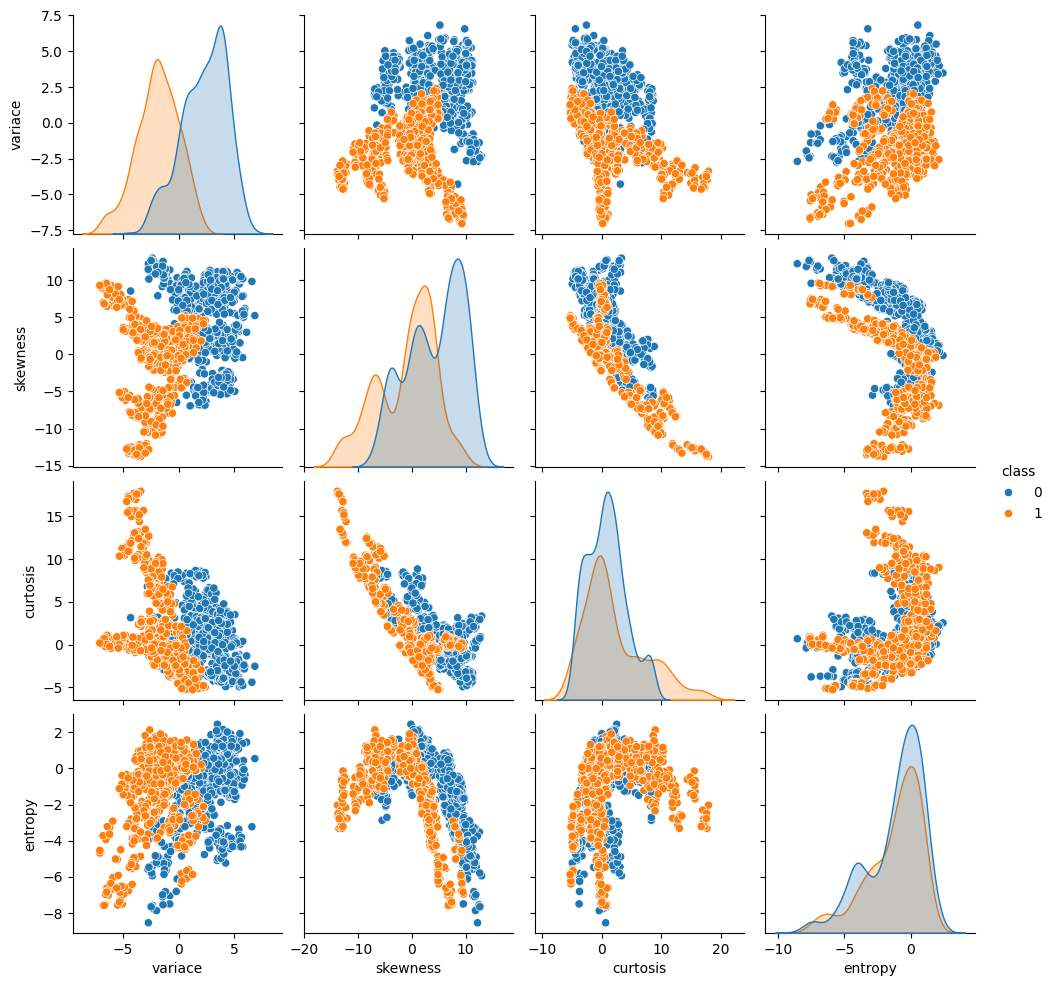

In [3]:
sns.pairplot(df, hue='class')

In [4]:
df.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['variace', 'skewness', 'curtosis', 'entropy']], df['class'], test_size=0.3)

### Model
#### Model build

In [14]:
model = Sequential()
input_layers = Input(shape=(4,))
layer = Dense(1, activation='sigmoid')
model.add(input_layers)
model.add(layer)

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train, y_train, epochs=50)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3896 - loss: 3.3695   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.9836 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.5117 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.3724 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.2990 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2569 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.2299 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9323 - loss: 0.2109 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9406 - loss: 0.1961 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.1843 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1745 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [16]:
model.evaluate(X_test, y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9806 - loss: 0.0771


[0.07710177451372147, 0.9805825352668762]